<a href="https://colab.research.google.com/github/rajivsam/cmi_count_data_modeling/blob/common_code_23_08_2021/week_5_tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!git clone -b common_code_23_08_2021 --single-branch https://github.com/rajivsam/cmi_count_data_modeling.git

In [ ]:
%cd /content/cmi_count_data_modeling/src
!chmod a+x /content/cmi_count_data_modeling/*

/content/cmi_count_data_modeling/src


# Overview:

[ Online Retail Data Set ](https://archive.ics.uci.edu/ml/datasets/online+retail) is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

This is an Exploratory Data Analysis on this data set to identify some important features impacting the hourly arrival of customers.

In [ ]:
# Importing the required packages
import sys
sys.path.append('./data_loading')
from local_dataframe_loader import *
sys.path.append('./data_processing')
from retail_data_processing import *
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# The Data Set

In [ ]:
#Instantiating a LocalDataFrame loader
x=LocalDataFrameLoader()

In [ ]:
#Loading the dataframe
data=x.get_dataframe()
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
# Cancelled Transactions
data.loc[data['InvoiceNo'].str.match(r'^C.*')==True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [ ]:
#Null values in CustomerID
data['CustomerID'].isna().sum()

135080

- This data set consits of 541909 rows and 8 columns. As the [documentation](https://archive.ics.uci.edu/ml/datasets/online+retail) suggests, this data set have many (9288) cancelled transactions. These are denoted by the the 'InvoiceNo' starting with 'C'.
- There are many (135080) Null values in the column 'CustomerID', these are the transactions made by unregistered customers.

# Data Preprocessing

In [ ]:
# Instantiating a RetailDataProcessing object
y= RetailDataProcessing()

- Cancelled transactions have no impact on the customers arrival. We can also ignore unregistered customers. So, dropping all the cancelled transactions and the transactions made by unregistered customers.

In [ ]:
# (a) Invoke the filter method to apply business rules
filtered_data=y.filter(x.df)

In [ ]:
filtered_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


- Transforming the data set into a new dataframe. Each row corrosponds to a day and the columns are all 1 hour intervals on everyday. The values are number of customers who made a transaction on that hour interval on a particular day.

In [ ]:
# (b) Invoke the transform method to get daily hourly counts
transformed_data=y.transform(filtered_data)

In [ ]:
transformed_data

Time,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,10:00:00,11:00:00,12:00:00,13:00:00,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
Date,,,,,,,,,,,,,,,,,,,,,,,,
2010-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,12.0,9.0,11.0,20.0,12.0,7.0,11.0,9.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-12-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,5.0,10.0,9.0,14.0,11.0,7.0,13.0,10.0,9.0,9.0,2.0,0.0,0.0,0.0,0.0
2010-12-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,6.0,4.0,9.0,6.0,9.0,6.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-12-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,13.0,17.0,16.0,7.0,14.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-12-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,11.0,12.0,19.0,13.0,8.0,12.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-12-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,5.0,9.0,9.0,18.0,16.0,16.0,11.0,15.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-12-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,6.0,9.0,17.0,25.0,10.0,14.0,8.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-12-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,7.0,8.0,12.0,20.0,12.0,9.0,11.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0


- Finding important hours for customer arrival

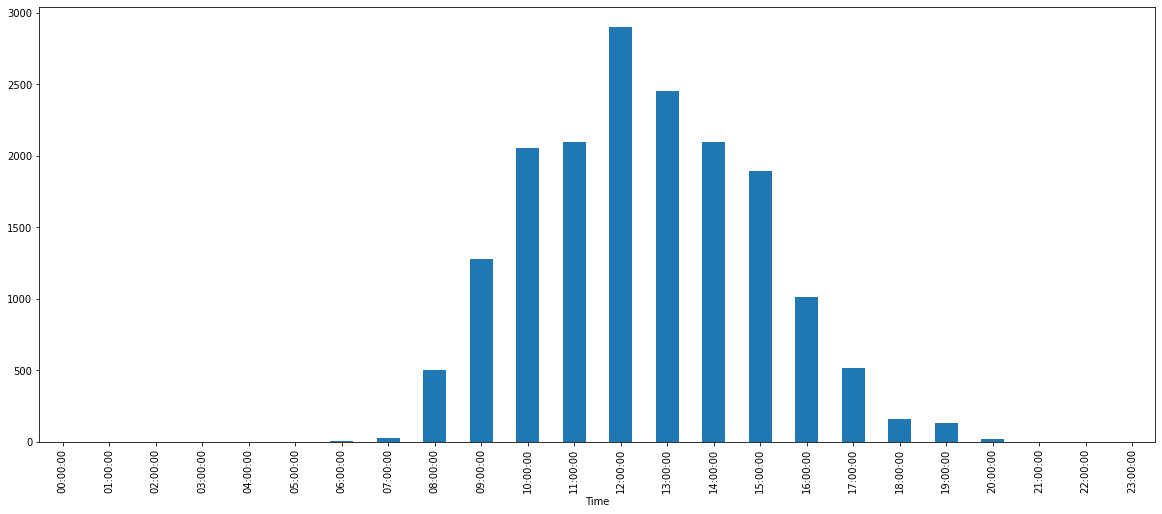

In [ ]:
plt.figure(figsize=(20,8))
transformed_data.sum().plot.bar()

- The bar plot suggest that, almost all the customers made transaction between 6 AM and 8 PM. So, we can drop other columns.

In [ ]:
dropped_data=y.drop_columns(transformed_data)

In [ ]:
dropped_data

Time,06:00:00,07:00:00,08:00:00,09:00:00,10:00:00,11:00:00,12:00:00,13:00:00,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00
Date,,,,,,,,,,,,,,
2010-12-01,0.0,0.0,3.0,12.0,9.0,11.0,20.0,12.0,7.0,11.0,9.0,4.0,0.0,0.0
2010-12-02,0.0,2.0,3.0,5.0,10.0,9.0,14.0,11.0,7.0,13.0,10.0,9.0,9.0,2.0
2010-12-03,0.0,0.0,0.0,5.0,6.0,4.0,9.0,6.0,9.0,6.0,3.0,2.0,0.0,0.0
2010-12-05,0.0,0.0,0.0,0.0,8.0,13.0,17.0,16.0,7.0,14.0,4.0,0.0,0.0,0.0
2010-12-06,0.0,0.0,2.0,4.0,11.0,12.0,19.0,13.0,8.0,12.0,2.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-12-05,0.0,0.0,3.0,5.0,9.0,9.0,18.0,16.0,16.0,11.0,15.0,6.0,0.0,0.0
2011-12-06,0.0,0.0,4.0,6.0,9.0,17.0,25.0,10.0,14.0,8.0,6.0,6.0,0.0,0.0
2011-12-07,0.0,0.0,7.0,7.0,8.0,12.0,20.0,12.0,9.0,11.0,5.0,4.0,0.0,0.0


- We are considering only the transactions made in 2011, there are only few in 2010. Here we are subsetting the dataframe into 4 quarters.

In [ ]:
# (c) Subset dataframe to quarters
subset_data=y.subset(dropped_data)

In [ ]:
subset_data['Q1']

Time,Date,06:00:00,07:00:00,08:00:00,09:00:00,10:00:00,11:00:00,12:00:00,13:00:00,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00
20,2011-01-04,0.0,0.0,0.0,0.0,6.0,5.0,5.0,7.0,6.0,5.0,1.0,0.0,0.0,0.0
21,2011-01-05,0.0,0.0,0.0,3.0,6.0,7.0,12.0,8.0,1.0,5.0,3.0,1.0,0.0,0.0
22,2011-01-06,0.0,0.0,1.0,3.0,4.0,5.0,7.0,3.0,5.0,6.0,5.0,4.0,3.0,0.0
23,2011-01-07,0.0,0.0,0.0,7.0,8.0,4.0,8.0,5.0,7.0,4.0,2.0,1.0,0.0,0.0
24,2011-01-09,0.0,0.0,0.0,0.0,5.0,12.0,9.0,4.0,9.0,7.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2011-03-28,0.0,1.0,1.0,5.0,5.0,6.0,10.0,5.0,11.0,6.0,3.0,0.0,0.0,0.0
92,2011-03-29,0.0,0.0,2.0,2.0,4.0,5.0,6.0,10.0,5.0,7.0,3.0,2.0,0.0,0.0
93,2011-03-30,0.0,0.0,0.0,8.0,7.0,7.0,12.0,11.0,6.0,7.0,4.0,1.0,0.0,0.0
94,2011-03-31,0.0,0.0,0.0,5.0,5.0,9.0,6.0,12.0,2.0,4.0,3.0,5.0,2.0,5.0


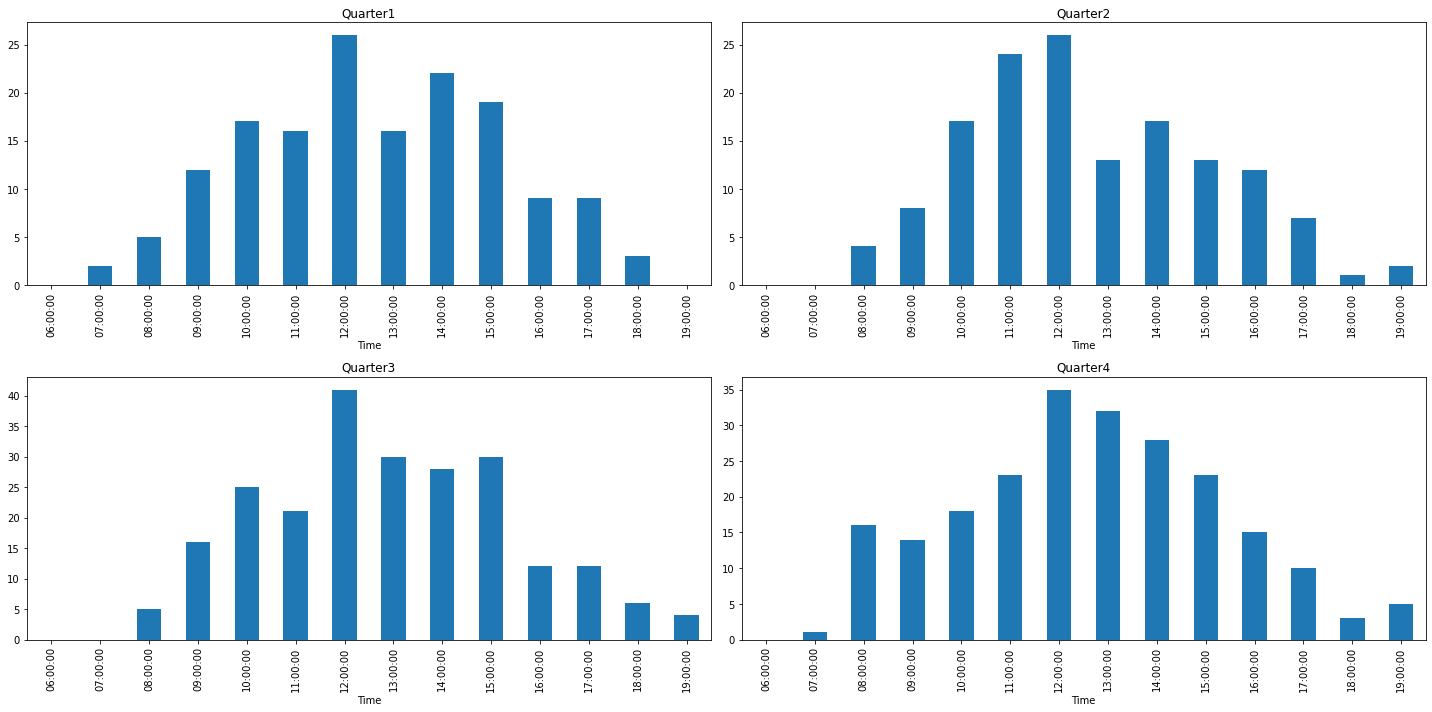

In [ ]:
#Sample plot for all quarters
plt.figure(figsize=(20,10))
for i in range(1,5):
  plt.subplot(2,2,i)
  sample=subset_data['Q'+str(i)].sample(n=3)
  sample.sum().plot.bar()
  plt.tight_layout()
  plt.title('Quarter'+str(i))

# Boxplot for hourly arrivals in different quarter

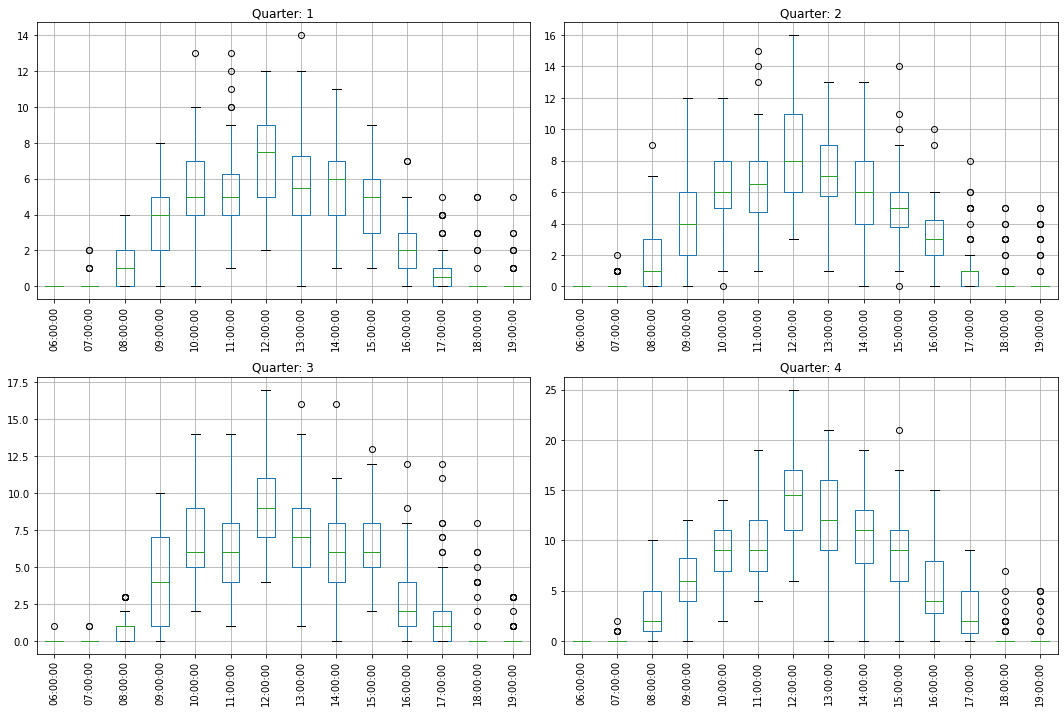

In [ ]:
plt.figure(figsize=(15,10))
for i in range(1,5):
  plt.subplot(2,2,i)
  plt.tight_layout()
  subset_data['Q'+str(i)].boxplot(rot=90)
  plt.title('Quarter: '+ str(i))

- Boxplots suggest that all 4 quarter have simmilar type of hourly arrival. for 6 AM- 8 AM and 6 PM- 8 PM, the average is around 0, because most of the values are 0. There are some non-zero values which are marked as outliers. Quarter 1 has values between 0 and 14, quarter 2 has between 0 and 16, quarter 3 has values betwwen 0 and 17, quarter 4 has between 0 and 25.

# Moving average plot for different quarter

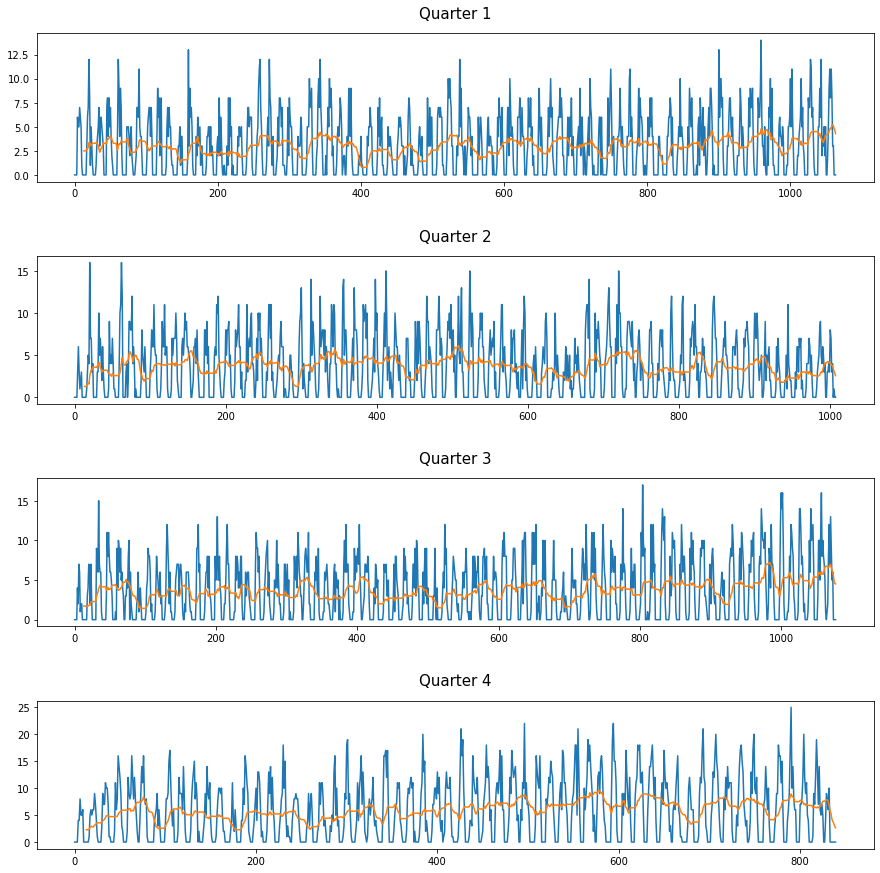

In [ ]:
fig,axes=plt.subplots(4,1,figsize=(15,15))
plt.subplots_adjust(hspace=0.5)

for i in range(4):
  Q=subset_data['Q'+str(i+1)].drop(columns=['Date']).values
  Q=np.reshape(Q,len(subset_data['Q'+str(i+1)])*14)
  S=pd.Series(Q)
  axes[i].set_title("Quarter "+str(i+1),fontsize=15,pad=15)
  S.plot(ax=axes[i])
  S.rolling(window=14).mean().plot(ax=axes[i])


- For window size 14, the moving average plot suggest that there are certain fluctuations in the plot over the data of each quarter. Which means there is a seasonal variation in the data of each quarter.

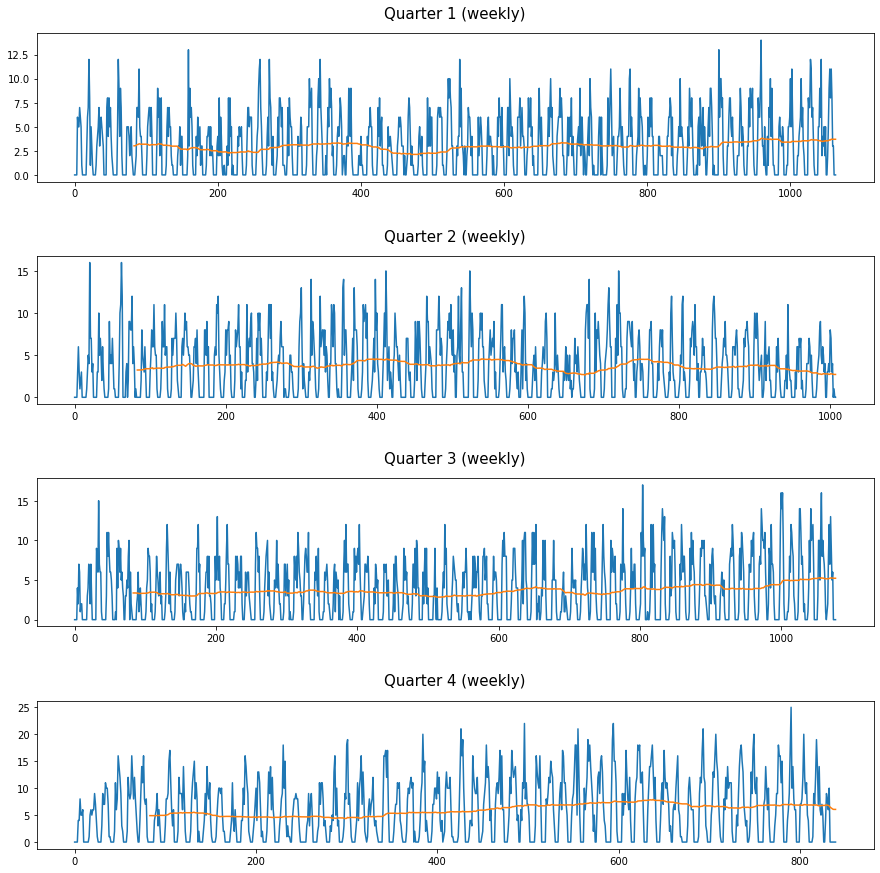

In [ ]:
fig,axes=plt.subplots(4,1,figsize=(15,15))
plt.subplots_adjust(hspace=0.5)

for i in range(4):
  Q=subset_data['Q'+str(i+1)].drop(columns=['Date']).values
  Q=np.reshape(Q,len(subset_data['Q'+str(i+1)])*14)
  S=pd.Series(Q)
  axes[i].set_title("Quarter "+str(i+1)+' (weekly)',fontsize=15,pad=15)
  S.plot(ax=axes[i])
  S.rolling(window=14*6).mean().plot(ax=axes[i])


- For window size 6*14 (weekly), we can see the fluctuations in previous plot were smoothened resulting in a trend in each quarterly plot. Which means the variation we observed in the previous plot was weekly variation i.e., the data varies significantly over the 6 days (Sunday to Friday) of each week for each quarter. 

# Finding significant lags using PACF plots for all quarters

In [ ]:
# (d)Invoke the tansform pacf_sequence to get the pandas time series for different quarters and plot the PACF for each quarter

Q_ts={}
for i in range(1,5):
  Q_ts[i]= y.transform_pacf_sequence(subset_data['Q'+str(i)])

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


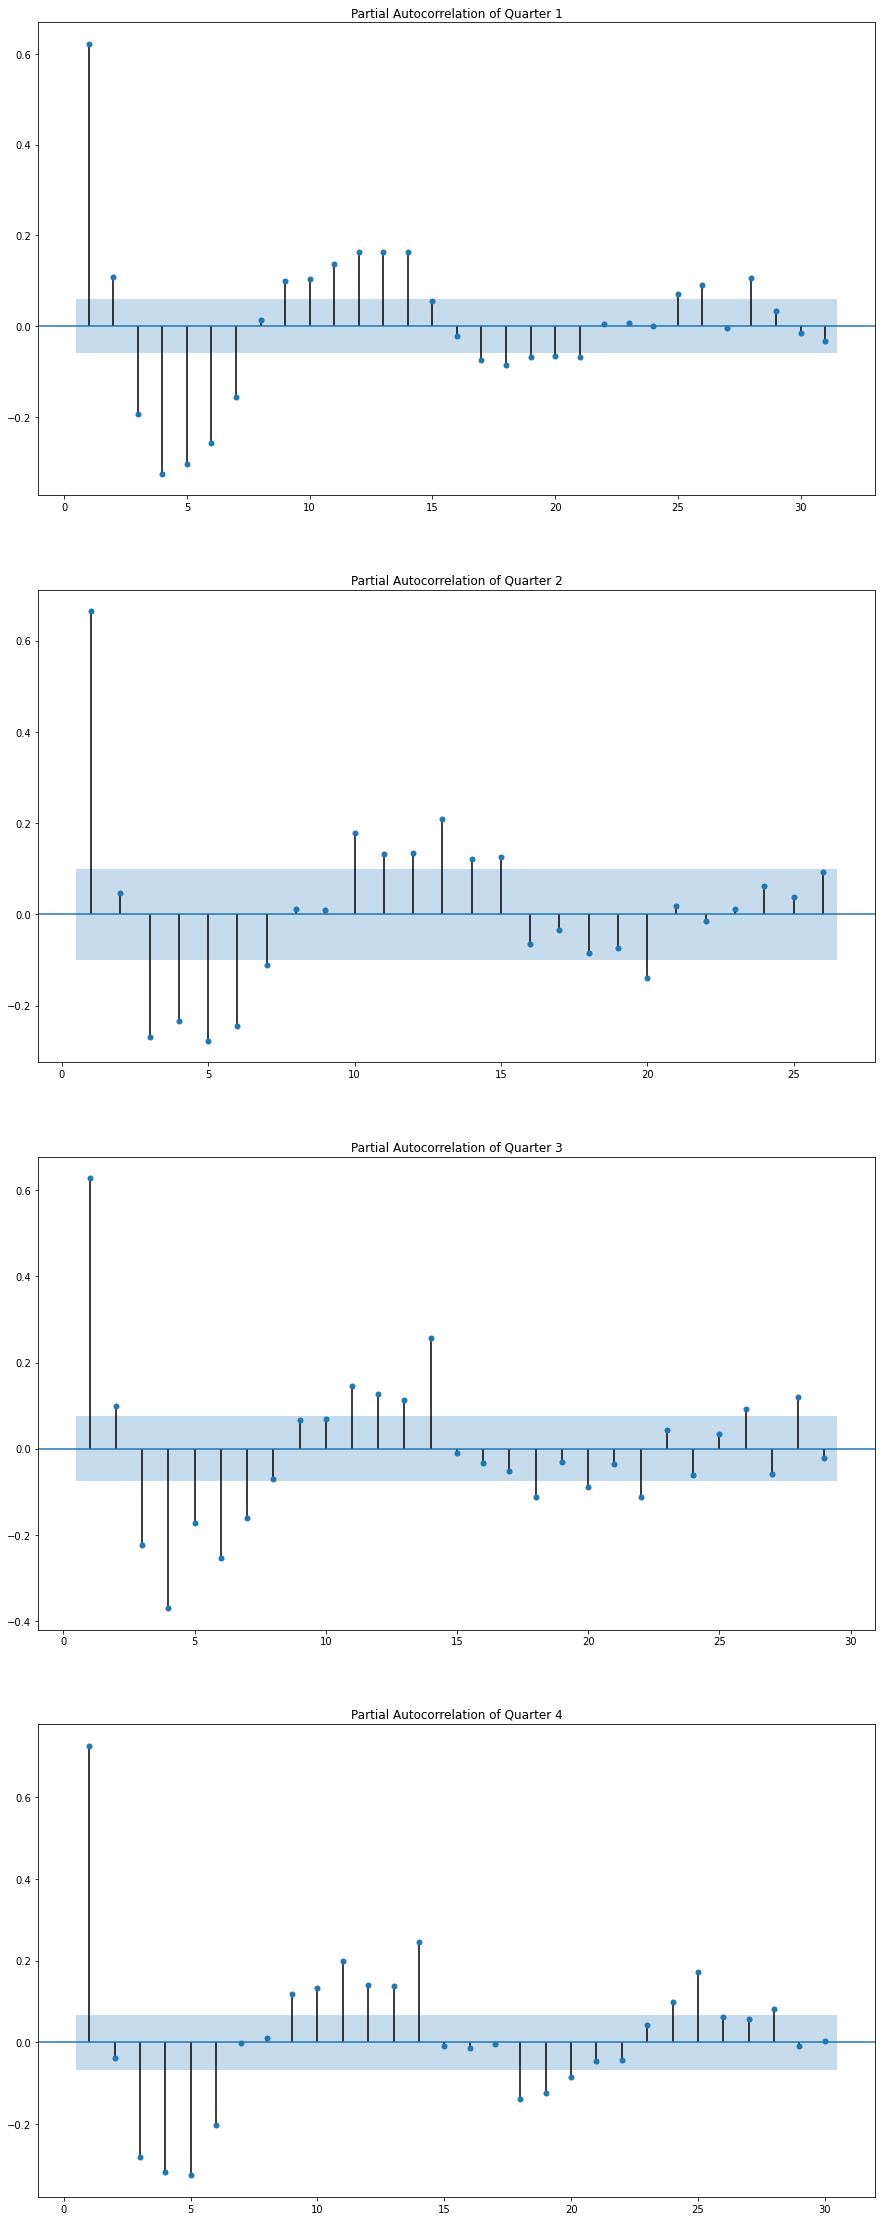

In [ ]:
fig,ax=plt.subplots(4,1,figsize=(15,40))
plt.subplots_adjust(hspace=0.2)
for i in range(4):
  plot_pacf(Q_ts[i+1],zero=False,title='Partial Autocorrelation of Quarter '+str(i+1),ax=ax[i])

In [ ]:
# Lags outside the confidence level ( blue shaded region)
lag={}
lag['Q1']=[28, 26, 25, 21, 20, 19, 18, 17, 14, 13, 12, 11, 10, 9, 7, 6, 5, 4, 3, 2, 1]
lag['Q2']=[20, 15, 14, 13, 12, 11, 10, 7, 6, 5, 4, 3, 1]
lag['Q3']=[28, 26, 22, 20, 18, 14, 13, 12, 11, 7, 6, 5, 4, 3, 2, 1]
lag['Q4']=[28, 25, 24, 20, 19, 18, 14, 13, 12, 11, 10, 9, 6, 5, 4, 3, 1]

# Summarizing importand features:
- Hourly arrival depends on the hour
- It depends on all the significant lags
- It depends on the day of the week
- It depends on the week number
- It also depend on the Month

# Creating the datasets with important features

In [ ]:
#	(e) Invoke the transform_hourly_arrivals_dataset to generate the datasets for the different quarters, save the dataset to the data directory.
df={}
for i in range(1,5):
  df['Q'+str(i)]=y.transform_hourly_arrivals_dataset(Q_ts[i],lag=lag['Q'+str(i)])

In [ ]:
df['Q1']

,arr(h-28),arr(h-26),arr(h-25),arr(h-21),arr(h-20),arr(h-19),arr(h-18),arr(h-17),arr(h-14),arr(h-13),arr(h-12),arr(h-11),arr(h-10),arr(h-9),arr(h-7),arr(h-6),arr(h-5),arr(h-4),arr(h-3),arr(h-2),arr(h-1),Day,Week,Month,arr(h)
h,,,,,,,,,,,,,,,,,,,,,,,,,
06:00:00,0.0,0.0,0.0,7.0,6.0,5.0,1.0,0.0,0.0,0.0,0.0,3.0,6.0,7.0,8.0,1.0,5.0,3.0,1.0,0.0,0.0,Thursday,1,1,0.0
07:00:00,0.0,0.0,6.0,6.0,5.0,1.0,0.0,0.0,0.0,0.0,3.0,6.0,7.0,12.0,1.0,5.0,3.0,1.0,0.0,0.0,0.0,Thursday,1,1,0.0
08:00:00,0.0,6.0,5.0,5.0,1.0,0.0,0.0,0.0,0.0,3.0,6.0,7.0,12.0,8.0,5.0,3.0,1.0,0.0,0.0,0.0,0.0,Thursday,1,1,1.0
09:00:00,0.0,5.0,5.0,1.0,0.0,0.0,0.0,0.0,3.0,6.0,7.0,12.0,8.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,Thursday,1,1,3.0
10:00:00,6.0,5.0,7.0,0.0,0.0,0.0,0.0,0.0,6.0,7.0,12.0,8.0,1.0,5.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,Thursday,1,1,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15:00:00,7.0,1.0,0.0,0.0,5.0,5.0,9.0,6.0,4.0,3.0,5.0,2.0,5.0,0.0,2.0,5.0,9.0,11.0,8.0,11.0,8.0,Friday,13,4,3.0
16:00:00,4.0,0.0,0.0,5.0,5.0,9.0,6.0,12.0,3.0,5.0,2.0,5.0,0.0,0.0,5.0,9.0,11.0,8.0,11.0,8.0,3.0,Friday,13,4,3.0
17:00:00,1.0,0.0,0.0,5.0,9.0,6.0,12.0,2.0,5.0,2.0,5.0,0.0,0.0,2.0,9.0,11.0,8.0,11.0,8.0,3.0,3.0,Friday,13,4,0.0


In [ ]:
df['Q2']

,arr(h-20),arr(h-15),arr(h-14),arr(h-13),arr(h-12),arr(h-11),arr(h-10),arr(h-7),arr(h-6),arr(h-5),arr(h-4),arr(h-3),arr(h-1),Day,Week,Month,arr(h)
h,,,,,,,,,,,,,,,,,
12:00:00,0.0,5.0,4.0,9.0,10.0,7.0,0.0,0.0,0.0,1.0,1.0,3.0,3.0,Wednesday,22,6,10.0
13:00:00,0.0,4.0,9.0,10.0,7.0,0.0,0.0,0.0,1.0,1.0,3.0,2.0,10.0,Wednesday,22,6,4.0
14:00:00,3.0,9.0,10.0,7.0,0.0,0.0,0.0,1.0,1.0,3.0,2.0,3.0,4.0,Wednesday,22,6,3.0
15:00:00,4.0,10.0,7.0,0.0,0.0,0.0,0.0,1.0,3.0,2.0,3.0,10.0,3.0,Wednesday,22,6,5.0
16:00:00,6.0,7.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,3.0,10.0,4.0,5.0,Wednesday,22,6,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15:00:00,3.0,5.0,4.0,6.0,5.0,3.0,4.0,3.0,3.0,4.0,3.0,8.0,3.0,Friday,26,7,4.0
16:00:00,4.0,4.0,6.0,5.0,3.0,4.0,0.0,3.0,4.0,3.0,8.0,7.0,4.0,Friday,26,7,0.0
17:00:00,5.0,6.0,5.0,3.0,4.0,0.0,0.0,4.0,3.0,8.0,7.0,3.0,0.0,Friday,26,7,1.0


In [ ]:
df['Q3']

,arr(h-28),arr(h-26),arr(h-22),arr(h-20),arr(h-18),arr(h-14),arr(h-13),arr(h-12),arr(h-11),arr(h-7),arr(h-6),arr(h-5),arr(h-4),arr(h-3),arr(h-2),arr(h-1),Day,Week,Month,arr(h)
h,,,,,,,,,,,,,,,,,,,,
06:00:00,0.0,0.0,7.0,1.0,2.0,0.0,0.0,0.0,0.0,6.0,2.0,7.0,3.0,0.0,0.0,0.0,Tuesday,27,7,0.0
07:00:00,0.0,0.0,6.0,2.0,0.0,0.0,0.0,0.0,3.0,2.0,7.0,3.0,0.0,0.0,0.0,0.0,Tuesday,27,7,0.0
08:00:00,0.0,4.0,1.0,2.0,0.0,0.0,0.0,3.0,4.0,7.0,3.0,0.0,0.0,0.0,0.0,0.0,Tuesday,27,7,0.0
09:00:00,0.0,2.0,2.0,0.0,0.0,0.0,3.0,4.0,7.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,Tuesday,27,7,9.0
10:00:00,4.0,7.0,2.0,0.0,0.0,3.0,4.0,7.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,Tuesday,27,7,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15:00:00,12.0,2.0,0.0,4.0,10.0,3.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,10.0,5.0,5.0,Sunday,35,8,5.0
16:00:00,0.0,1.0,1.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,10.0,5.0,5.0,5.0,Sunday,35,8,1.0
17:00:00,2.0,3.0,4.0,10.0,5.0,0.0,0.0,0.0,0.0,5.0,5.0,10.0,5.0,5.0,5.0,1.0,Sunday,35,8,0.0


In [ ]:
df['Q4']

,arr(h-28),arr(h-25),arr(h-24),arr(h-20),arr(h-19),arr(h-18),arr(h-14),arr(h-13),arr(h-12),arr(h-11),arr(h-10),arr(h-9),arr(h-6),arr(h-5),arr(h-4),arr(h-3),arr(h-1),Day,Week,Month,arr(h)
h,,,,,,,,,,,,,,,,,,,,,
06:00:00,0.0,0.0,4.0,5.0,6.0,0.0,0.0,0.0,1.0,5.0,6.0,5.0,9.0,7.0,4.0,1.0,0.0,Tuesday,40,10,0.0
07:00:00,0.0,4.0,4.0,6.0,0.0,0.0,0.0,1.0,5.0,6.0,5.0,6.0,7.0,4.0,1.0,0.0,0.0,Tuesday,40,10,0.0
08:00:00,0.0,4.0,8.0,0.0,0.0,0.0,1.0,5.0,6.0,5.0,6.0,6.0,4.0,1.0,0.0,0.0,0.0,Tuesday,40,10,3.0
09:00:00,0.0,8.0,5.0,0.0,0.0,0.0,5.0,6.0,5.0,6.0,6.0,9.0,1.0,0.0,0.0,0.0,3.0,Tuesday,40,10,9.0
10:00:00,4.0,5.0,5.0,0.0,0.0,0.0,6.0,5.0,6.0,6.0,9.0,7.0,0.0,0.0,0.0,0.0,9.0,Tuesday,40,10,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15:00:00,11.0,0.0,0.0,9.0,7.0,12.0,14.0,6.0,5.0,7.0,5.0,0.0,9.0,8.0,6.0,10.0,0.0,Friday,49,12,0.0
16:00:00,5.0,0.0,0.0,7.0,12.0,19.0,6.0,5.0,7.0,5.0,0.0,0.0,8.0,6.0,10.0,0.0,0.0,Friday,49,12,0.0
17:00:00,4.0,0.0,0.0,12.0,19.0,14.0,5.0,7.0,5.0,0.0,0.0,4.0,6.0,10.0,0.0,0.0,0.0,Friday,49,12,0.0


In [ ]:
for i in range(1,5):
  df['Q'+str(i)].to_csv('../data/Q'+str(i)+'_transform_hourly_arrivals_dataset.csv')

# Uncomment and Run the following cell to download all 4 data files

In [ ]:
#from google.colab import files
#for i in range(1,5):
  #files.download('Q'+str(i)+'_transform_hourly_arrivals_dataset.csv')